In [1]:
# The ``inline`` flag will use the appropriate backend to make figures appear inline in the notebook.  
#%matplotlib inline

import pandas as pd
import numpy as np

# `plt` is an alias for the `matplotlib.pyplot` module
import matplotlib.pyplot as plt

# import seaborn library (wrapper of matplotlib)
import seaborn as sns

# Using the scikit-learn library to load a dataset
from sklearn.datasets import load_digits

### Create Data (not shown in video)

We are going to load the digits dataset from scikit-learn, but there isn't time to teach the loading the library and such. 

In [2]:
# this is a special method for scikit-learn to load data
digits = load_digits()

In [3]:
type(digits)

sklearn.utils.Bunch

In [4]:
# Each datapoint is a 8x8 image of a digit.
df = pd.DataFrame(list(digits.data))

In [5]:
label_df = pd.DataFrame(list(digits.target), columns = ['label'])

In [6]:
df = pd.concat([df, label_df], axis = 1)

In [7]:
df.to_csv('data/digitsDataset.csv', index = False)

In [8]:
df.shape

(1797, 65)

## Subplots

It is often useful to compare different subsets of your data side by side. To demonstrate this, we are going to visualize images side by side.

In [9]:
# The ``inline`` flag will use the appropriate backend to make figures appear inline in the notebook.  
%matplotlib inline

import pandas as pd
import numpy as np

# `plt` is an alias for the `matplotlib.pyplot` module
import matplotlib.pyplot as plt

### Load Data

The dataset is the digits dataset (from scikit-learn) that I arranged into a csv file for convenience. The data consists of pixel intensity values for 1797 images that are 8 by 8 pixels. This means that the dataset has 64 total values per image. Each image is labeled with a number from 0-9.

In [10]:
# Load digits dataset
filename = 'data/digitsDataset.csv'
df = pd.read_csv(filename)

In [11]:
# Columns 0 to 63 are the pixel intensity values for an 8 by 8 image. 
# label column is what the image is supposed to be. 
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


### Show image

In [12]:
pixel_colnames = df.columns[:-1]

In [13]:
pixel_colnames

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63'],
      dtype='object')

In [14]:
# Get all columns except the label column for the first image
image_values = df.loc[0, pixel_colnames].values

In [15]:
# This is not the correct format for viewing images
image_values.shape

(64,)

The images are 8 pixels by 8 pixels. It is important to keep in mind that just because a dataset is stored in a certain way, doesnt mean it was meant to be viewed that way. 

In [16]:
image_values.reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

As it is not easy to understand pixel intensity values by looking at an array, lets visualize the image. 

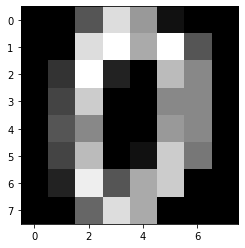

In [17]:
plt.imshow(image_values.reshape(8,8), cmap ='gray')

#### Not the correct way to format your data

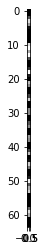

In [18]:
# this is not the format the image should be in. 
plt.imshow(image_values.reshape(64, 1), cmap = 'gray')

### Subplot Creation
We are going to create a 5 by 1 plot. 

Text(0.5, 1.0, 'Label: 4')

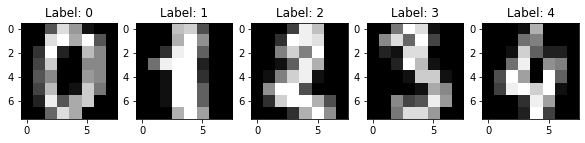

In [19]:
# There is a large amount of replicated code

plt.figure(figsize=(10,2))

## The first image
plt.subplot(1, 5, 1)
image_values = df.loc[0, pixel_colnames].values
image_label = df.loc[0, 'label']
plt.imshow(image_values.reshape(8,8), cmap ='gray')
plt.title('Label: ' + str(image_label))

# The second image
plt.subplot(1, 5, 2)
image_values = df.loc[1, pixel_colnames].values
image_label = df.loc[1, 'label']
plt.imshow(image_values.reshape(8,8), cmap ='gray')
plt.title('Label: ' + str(image_label))

# The third image
plt.subplot(1, 5, 3)
image_values = df.loc[2, pixel_colnames].values
image_label = df.loc[2, 'label']
plt.imshow(image_values.reshape(8,8), cmap ='gray')
plt.title('Label: ' + str(image_label))

# The fourth image
plt.subplot(1, 5, 4)
image_values = df.loc[3, pixel_colnames].values
image_label = df.loc[3, 'label']
plt.imshow(image_values.reshape(8,8), cmap ='gray')
plt.title('Label: ' + str(image_label))

# The fifth image
plt.subplot(1, 5, 5)
image_values = df.loc[4, pixel_colnames].values
image_label = df.loc[4, 'label']
plt.imshow(image_values.reshape(8,8), cmap ='gray')
plt.title('Label: ' + str(image_label))

#### Using a for loop

In [20]:
# range(0,5) produces a sequence of integers from 0
# up to but not including 5
list(range(0,5))

[0, 1, 2, 3, 4]

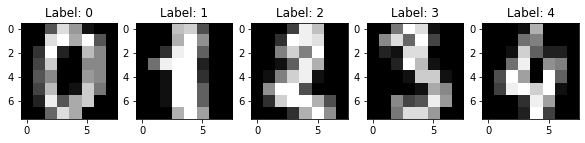

In [21]:
# This is a lot less code

plt.figure(figsize=(10,2))
for index in range(0, 5):

    plt.subplot(1, 5, 1 + index )
    image_values = df.loc[index, pixel_colnames].values
    image_label = df.loc[index, 'label']
    plt.imshow(image_values.reshape(8,8), cmap ='gray')
    plt.title('Label: ' + str(image_label))